<a href="https://colab.research.google.com/github/shawmoonazad/Qiskit_MRA/blob/main/Market_analysis_with_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Customer Segmentation using Kmean clustering written by Md Shawmoon Azad

##Importing libraries

In [3]:
import pandas as pd

# Load the data from the uploaded file

data = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the Gender column
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Display basic statistics of the data and check the encoding
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


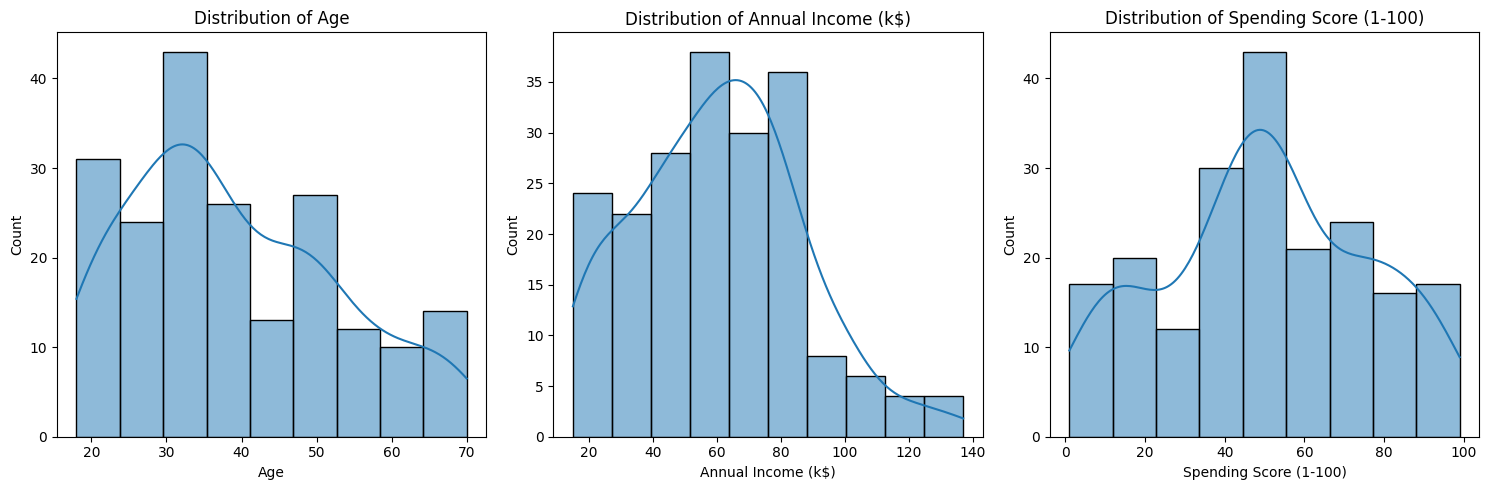

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Draw a histogram for each numerical column
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

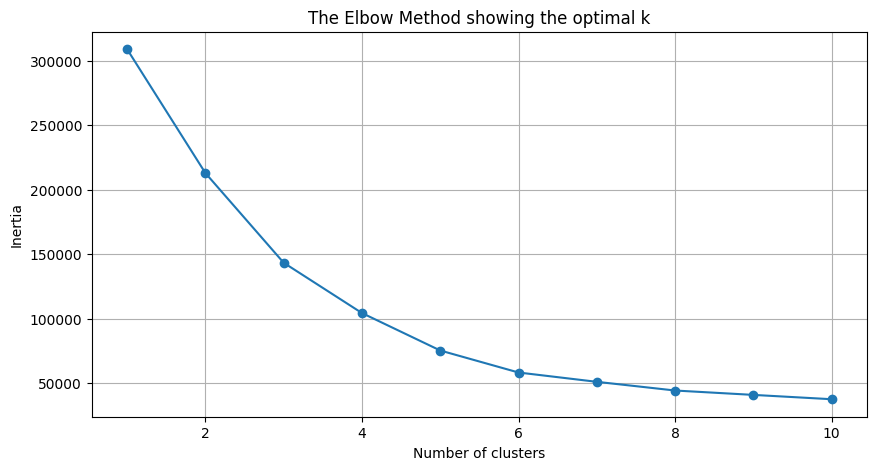

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Extracting the features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Calculate distortion for a range of number of cluster
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the distortions of K-means
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


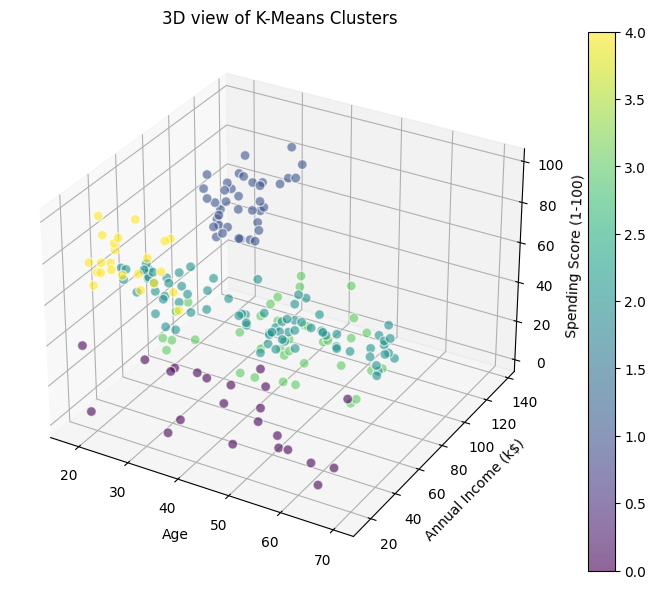

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Applying K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(features)

# 3D scatter plot of clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=data['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolors='w')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D view of K-Means Clusters')
plt.colorbar(scatter)
plt.show()


In [9]:
# Calculating mean values for each cluster
cluster_summary = data.groupby('Cluster').mean()
cluster_summary[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,43.088608,55.291139,49.569620
3,40.666667,87.750000,17.583333
4,25.521739,26.304348,78.565217


The cluster averages reveal distinct segments within the customer base:

Cluster 0:

Age: Approx. 45 years
Annual Income: ~$26k
Spending Score: Low ~21
Profile: Older customers with lower income and low spending habits.

Cluster 1:

Age: Approx. 33 years
Annual Income: ~$87k
Spending Score: High ~82
Profile: Younger, affluent customers with high spending habits.

Cluster 2:

Age: Approx. 43 years
Annual Income: ~$55k
Spending Score: Moderate ~50
Profile: Middle-aged with moderate income and spending habits.

Cluster 3:

Age: Approx. 41 years
Annual Income: ~$88k
Spending Score: Very low ~18
Profile: Middle-aged, high earners but low spenders.

Cluster 4:

Age: Approx. 26 years
Annual Income: ~$26k
Spending Score: High ~79
Profile: Younger customers with lower income but high spending habits.

These insights could be valuable for developing targeted marketing strategies. For instance, offering premium products and personalized services to Cluster 1, while promoting cost-effective options and savings to Clusters 0 and 3. These strategies can enhance customer engagement and increase business profitability.

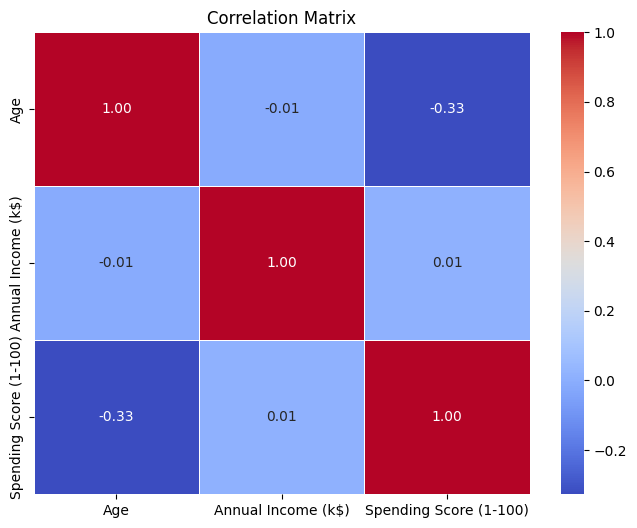

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,False,45.217391,26.304348,20.913043
1,False,32.692308,86.538462,82.128205
2,False,43.088608,55.291139,49.569620
3,True,40.666667,87.750000,17.583333
4,False,25.521739,26.304348,78.565217


In [10]:
# Correlation matrix calculation
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Adding Gender back for cluster profiling with gender
cluster_gender_summary = data.groupby('Cluster').agg({
    'Gender': lambda x: (x.mean() > 0.5),  # True if majority are male, False if female
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})
cluster_gender_summary


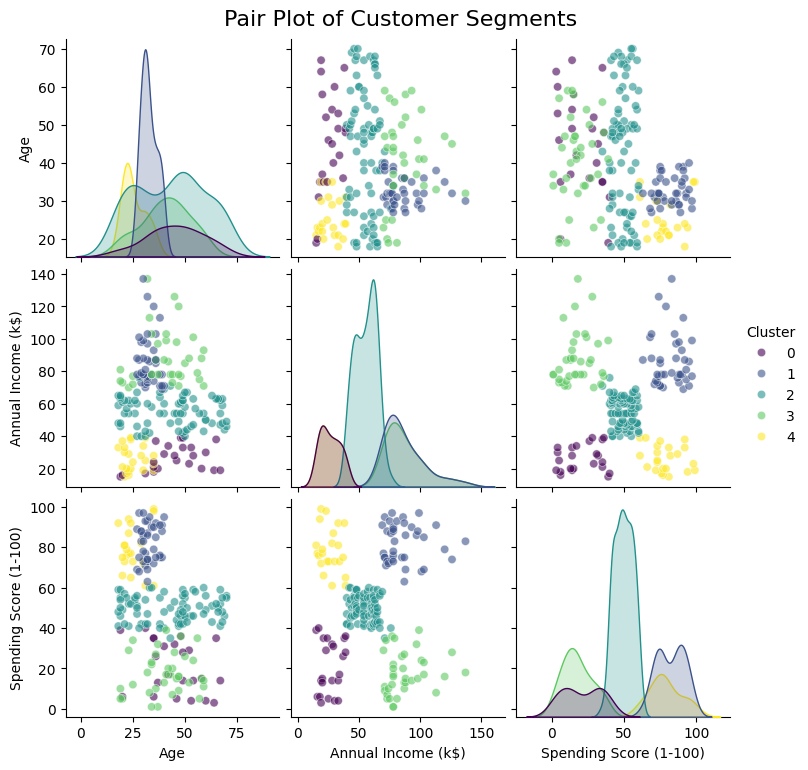

In [11]:
# Pair plot with clustering color coding
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
             palette='viridis', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Customer Segments', size=16, y=1.02)
plt.show()


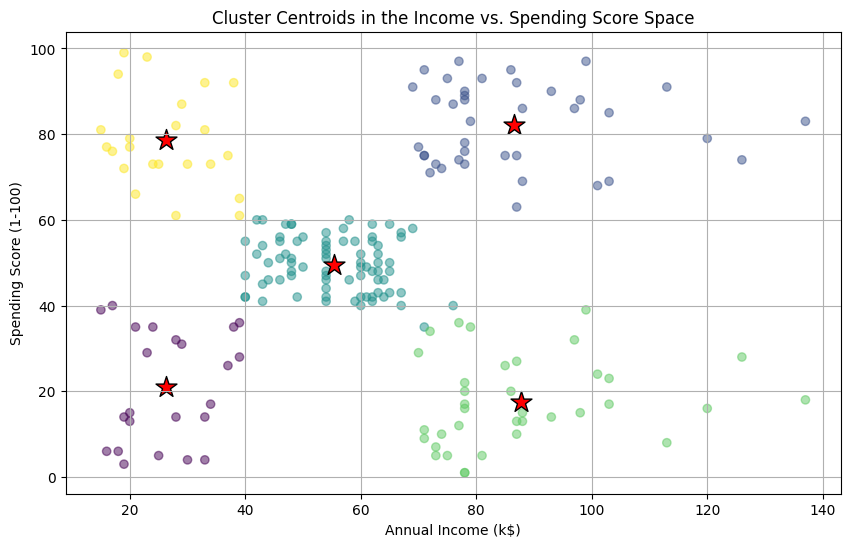

In [12]:
# Generate cluster centroid plot
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 1], centroids[:, 2], c='red', s=250, marker='*', edgecolors='black')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('Cluster Centroids in the Income vs. Spending Score Space')
plt.grid(True)
plt.show()

Here's the overall analysis of the data.

### Cluster 0
- **Demographic Profile**: Predominantly older and female.
- **Age**: Around 45 years on average.
- **Annual Income**: Low, averaging about $26k.
- **Spending Score**: Very low, with an average score of around 21.
- **Characteristics**: This cluster represents older customers with lower income and minimal spending habits. Marketing strategies targeting this group could focus on value and reliability.

### Cluster 1
- **Demographic Profile**: Predominantly younger and female.
- **Age**: Average age of about 33 years.
- **Annual Income**: High, averaging around $87k.
- **Spending Score**: High, with an average score of 82.
- **Characteristics**: Affluent and young, these customers are active spenders. High-end and premium branding strategies could be effective for this segment.

### Cluster 2
- **Demographic Profile**: Predominantly middle-aged and female.
- **Age**: Around 43 years old.
- **Annual Income**: Moderate, averaging about $55k.
- **Spending Score**: Moderate, with a score around 49.
- **Characteristics**: This group has moderate income and spending habits. Products and services that offer a balance between cost and quality could appeal to this segment.

### Cluster 3
- **Demographic Profile**: Predominantly middle-aged and male.
- **Age**: Around 41 years old.
- **Annual Income**: Very high, averaging $88k.
- **Spending Score**: Very low, with an average score of about 18.
- **Characteristics**: Despite their high income, these customers are low spenders, which might indicate a preference for savings or investment-focused financial products.

### Cluster 4
- **Demographic Profile**: Predominantly younger and female.
- **Age**: Young, with an average age of 26 years.
- **Annual Income**: Low, similar to Cluster 0, averaging about $26k.
- **Spending Score**: High, with an average score of 79.
- **Characteristics**: Young, with lower incomes but high willingness to spend, this group might be responsive to trendy and affordable products, including fashion and technology.
